### __BUSA8001 (S2, 2023) Group Assignment - Predicting Used Car Sale Prices__

---

**Kaggle Competition Ends:** Friday, 3 November 2023 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 3 November 2023 @ 11.59pm (Week 13)  

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models
- Assessment Summary:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new explanatory variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  


**Instructions:**

- Form a team of 3 students
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a](https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a)
    - Team leader to click on `team` and join and invite other 2 team members to join
    - Your **team's name must start** with our unit code, for instance you could have a team called BUSA8001_masterful_geniuses
- All team members should work on all the tasks however   
    - Choose a team member who will be responsible for one of each of the 3 tasks listed below    
- Your predictions must be generated by a model you develop here
    - You will receive a mark of **zero** if your code does not produce the forecasts you submit to Kaggle

**Marks**:

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work
- 1 mark: Ranking in the top 5 places of your unit on Kaggle  
- 3 marks: Reaching the first place in the competition   


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Limit of 20 submission per day
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_Team_Name.ipynb` where Team_Name is your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups
    - One 15 minute video recording of your work
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)

---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: Actuaries_007
- Team Leader and Team Member 1: MARWA GHASSA 47772018
- Team Member 2: SHEYLA DZAMBIC 47339225
- Team Member 3: NIYATI DAHIYA 47836555

---

## Task 1: Problem Description and Initial Data Analysis

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a](https://www.kaggle.com/t/32b34f072642495487836cf93453ac6a)
2. Referring to Competition Overview and the data provided on Kaggle write **Problem Description** (about 500 words) focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below,

- Using the following headings:
    - Forecasting Problem - explain what you are trying to do and how it could be used in the real world (i.e. why it may be important)
    - Evaluation Criteria - explain the criteria is used to assess forecast performance
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you find - do not impute missing values at this stage)
    - You should **not** discuss any specific predictive algorithms at this stage
    - Note: Your written portion of this task should be completed in a single Markdown cell
    
Total Marks: 12


In [539]:
import pandas as pd
import seaborn as sns
df_train= pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


df_train.isnull().sum()
df_test.isnull().sum()

vin                       0
back_legroom             53
body_type                 2
city                      0
city_fuel_economy       237
daysonmarket              0
dealer_zip                0
engine_displacement      59
engine_type              36
exterior_color            0
franchise_dealer          0
front_legroom            53
fuel_tank_volume         53
fuel_type                29
height                   53
highway_fuel_economy    237
horsepower               59
interior_color            0
is_new                    0
latitude                  0
length                   53
listed_date               0
listing_color             0
longitude                 0
make_name                 0
maximum_seating          53
mileage                  76
model_name                0
power                   126
savings_amount            0
seller_rating             3
torque                  141
transmission             13
transmission_display     13
wheel_system             43
wheelbase           

#Forecasting Problem
We are attempting to predict car pricing based on unique and distinct traits by putting several models into practise. Any automated business can use this to introduce a new product and set prices based on the models being utilised.This can assist in establishing a range and researching the opposition.

#Evaluation Criteria
For assessing the performance in our opinion is to use the MSE for linear regression and R-squared. MSE enable us to know the quality of estimator from the models and R-squared shows how well our data fits with the regression model. Low MSE and High R-squared is desirable.

# Types of Variables
|Variable Kind|Number of Features|Feature Names
| --- | --- | --- |
| Numeric | 18 |back_legroom,city_fuel_economy,daysonmarket,engine_displacement,fuel_tank_volume,height,highway_fuel_economy,horsepower,latitude,length,longitude,maximum_seating,front_legroom	,fuel_tank_volume,mileage,savings_amount,seller_rating,wheelbase,width,price |
| Ordinal  | 4 |listed_date, no_of_gears,power, torque|
| Nominal | 16 | body_type,city,dealer_zip,engine_type,exterior_color,franchise_dealer,fuel_type,interior_color,is_new,listing_color,make_name,model_name,transmission,transmission_display,wheel_system,year|

# Data Summary
There are two sets of data: the train dataset and the test dataset. Since price is an additional variable in the training data, the test data set has 38 variables while the train data set has 39.The vin variable serves as an ID or index variable.The price is the target variable. We have both categorical and numerical data in our data. We separated several of the columns into two categories because they contained multiple values, such as power, which is separated into power_rpm and maximum_power.

# Missing Values
As per te code above it shows that there are a lot of missing values in both train and test data set which we will futher impute by using mean or mode. Mean is used to calculate the missing values for numerical variables whereas mode is used to calculate missing values for categorical variables.


---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering
- In this task you will follow a set of instructions/questions listed below.
- Make sure you explain each answer carefully both in Markdown text and on your video.

Total Marks: 12

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, back_legroom feature is in object format containing both numerical values and text. Extract numerical values (equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [540]:
import pandas as pd
df_train.drop(["vin"],axis=1,inplace=True)
vin_df = pd.DataFrame(df_test['vin'].copy())
df_test.drop(["vin"],inplace=True,axis=1)

df_train= df_train.replace('--',pd.NA)
df_test= df_test.replace('--',pd.NA)
df = pd.concat([df_train, df_test], axis=0)

In [541]:
df_train['back_legroom'] = df_train['back_legroom'].str.replace(' in', ' ')
df_train['back_legroom'] = pd.to_numeric(df_train['back_legroom'])

df_train['front_legroom'] = df_train['front_legroom'].str.replace(' in', ' ')
df_train['front_legroom'] = pd.to_numeric(df_train['front_legroom'])

df_train['fuel_tank_volume'] = df_train['fuel_tank_volume'].str.replace('gal', '')
df_train['fuel_tank_volume'] = pd.to_numeric(df_train['fuel_tank_volume'])

df_train['height'] = df_train['height'].str.replace('in', '')
df_train['height'] = pd.to_numeric(df_train['height'])

df_train['length'] = df_train['length'].str.replace('in', '')
df_train['length'] = pd.to_numeric(df_train['length'])

df_train['maximum_seating'] = df_train['maximum_seating'].str.replace('seats', '')
df_train['maximum_seating'] = pd.to_numeric(df_train['maximum_seating'])

df_train['wheelbase'] = df_train['wheelbase'].str.replace('in', '')
df_train['wheelbase'] = pd.to_numeric(df_train['wheelbase'])

df_train['width'] = df_train['width'].str.replace('in', '')
df_train['width'] = pd.to_numeric(df_train['width'])

df_train['maximum_torque'] = df_train['torque'].str.split('@').str[0]
df_train['maximum_torque'] = df_train['maximum_torque'].str.replace('lb-ft ', '')

df_train['torque_rpm'] = df_train['torque'].str.split('@').str[1]
df_train['torque_rpm'] = df_train['torque_rpm'].str.replace('RPM', '')

df_train['maximum_power'] = df_train['power'].str.split('@').str[0]
df_train['maximum_power'] = df_train['maximum_power'].str.replace('hp','')

df_train['power_rpm'] = df_train['power'].str.split('@').str[1]
df_train['power_rpm'] = df_train['power_rpm'].str.replace('RPM', '')

df_train['no_of_gears'] = df_train['transmission_display'].str.split('-').str[0]

# df_train['transmission_type'] = df_train['transmission_display'].str.split('-').str[1]
# df_train['transmission_type'] = df_train['transmission_type'].str.replace('','')

`(Task 2, Question 1 Text Here - insert more cells as required)`

In [542]:
df_test['back_legroom'] = df_test['back_legroom'].str.replace(' in', ' ')
df_test['back_legroom'] = pd.to_numeric(df_test['back_legroom'])

df_test['front_legroom'] = df_test['front_legroom'].str.replace(' in', ' ')
df_test['front_legroom'] = pd.to_numeric(df_test['front_legroom'])

df_test['fuel_tank_volume'] = df_test['fuel_tank_volume'].str.replace('gal', '')
df_test['fuel_tank_volume'] = pd.to_numeric(df_test['fuel_tank_volume'])

df_test['height'] = df_test['height'].str.replace('in', '')
df_test['height'] = pd.to_numeric(df_test['height'])

df_test['length'] = df_test['length'].str.replace('in', '')
df_test['length'] = pd.to_numeric(df_test['length'])

df_test['maximum_seating'] = df_test['maximum_seating'].str.replace('seats', '')
df_test['maximum_seating'] = pd.to_numeric(df_test['maximum_seating'])

df_test['wheelbase'] = df_test['wheelbase'].str.replace('in', '')
df_test['wheelbase'] = pd.to_numeric(df_test['wheelbase'])

df_test['width'] = df_test['width'].str.replace('in', '')
df_test['width'] = pd.to_numeric(df_test['width'])

df_train['maximum_torque'] = df_train['torque'].str.split('@').str[0]
df_train['maximum_torque'] = df_train['maximum_torque'].str.replace('lb-ft ', '')

df_train['torque_rpm'] = df_train['torque'].str.split('@').str[1]
df_train['torque_rpm'] = df_train['torque_rpm'].str.replace('RPM', '')

df_train['maximum_power'] = df_train['power'].str.split('@').str[0]
df_train['maximum_power'] = df_train['maximum_power'].str.replace('hp','')

df_train['power_rpm'] = df_train['power'].str.split('@').str[1]
df_train['power_rpm'] = df_train['power_rpm'].str.replace('RPM', '')

df_train['no_of_gears'] = df_train['transmission_display'].str.split('-').str[0]

# df_train['transmission_type'] = df_train['transmission_display'].str.split('-').str[1]
# df_train['transmission_type'] = df_train['transmission_type'].str.replace('','')

**Task 2, Question 2** Create at least 5 new features from the existing numerical variables which contain multiple items of information, for example you could extract maximum torque and torque rpm from the torque variable.  
(2 marks)

In [543]:
df_test['maximum_torque'] = df_test['torque'].str.split('@').str[0]
df_test['maximum_torque'] = df_test['maximum_torque'].str.replace('lb-ft ', '')
df_test['maximum_torque'] = pd.to_numeric(df_test['maximum_torque'])
df_test['torque_rpm'] = df_test['torque'].str.split('@').str[1]
df_test['torque_rpm'] = df_test['torque_rpm'].str.replace('RPM', '')

df_test['maximum_power'] = df_test['power'].str.split('@').str[0]
df_test['maximum_power'] = df_test['maximum_power'].str.replace('hp', '')

df_test['power_rpm'] = df_test['power'].str.split('@').str[1]
df_test['power_rpm'] = df_test['power_rpm'].str.replace('RPM', '')

df_test['no_of_gears'] = df_test['transmission_display'].str.split('-').str[0]
# df_test['transmission_type'] = df_test['transmission_display'].str.split('-').str[1]
# df_test['transmission_type'] = df_test['transmission_type'].str.replace('','')

`(Task 2, Question 2 Text Here - insert more cells as required)`

**Task 2, Question 3**: Impute missing values for all features in both the training and test datasets.   
(3 marks)

In [544]:
imputation_values = {
    'back_legroom': df_train['back_legroom'].mean(),
    'city_fuel_economy': df_train['city_fuel_economy'].mean(),
    'daysonmarket': df_train['daysonmarket'].mean(),
    'dealer_zip': df_train['dealer_zip'].mode()[0],
    'engine_displacement': df_train['engine_displacement'].mean(),
    'front_legroom': df_train['front_legroom'].mode()[0],
    'fuel_tank_volume': df_train['fuel_tank_volume'].mean(),
    'height': df_train['height'].mean(),
    'highway_fuel_economy': df_train['highway_fuel_economy'].mean(),
    'horsepower': df_train['horsepower'].mean(),
    'latitude': df_train['latitude'].mean(),
    'length': df_train['length'].mean(),
    'listing_color': df_train['listing_color'].mode()[0],
    'longitude': df_train['longitude'].mean(),
    'maximum_seating': df_train['maximum_seating'].mean(),
    'mileage': df_train['mileage'].mean(),
    'savings_amount': df_train['savings_amount'].mean(),
    'seller_rating': df_train['seller_rating'].mean(),
    'transmission': df_train['transmission'].mode()[0],
    'wheel_system': df_train['wheel_system'].mode()[0],
    'wheelbase': df_train['wheelbase'].mean(),
    'width': df_train['width'].mean(),
    'year': df_train['year'].mode()[0],
    'price': df_train['price'].mean(),
    'maximum_torque': df_train['maximum_torque'].mode()[0],
    'torque_rpm': df_train['torque_rpm'].mode()[0],
    'power_rpm': df_train['power_rpm'].mode()[0],
    'no_of_gears': df_train['no_of_gears'].mode()[0],
    'engine_type': df_train["engine_type"].mode()[0],
    'fuel_type': df_train["fuel_type"].mode()[0],
    'maximum_power': df_train["maximum_power"].mode()[0],
    'body_type': df_train["body_type"].mode()[0]}

df_train.fillna(imputation_values, inplace=True)
df_train.drop(["torque"],axis=1,inplace=True)
df_train.drop(["power"],axis=1,inplace=True)
df_train.drop(["transmission_display"],axis=1,inplace=True)
# df_train.drop(["transmission_type"],axis=1,inplace=True)
df_train.drop(["maximum_power"],axis=1,inplace=True)

In [545]:
imputation_values_test = {
    'back_legroom': df_test['back_legroom'].mode()[0],
    'city_fuel_economy': df_test['city_fuel_economy'].mean(),
    'daysonmarket': df_test['daysonmarket'].mean(),
    'dealer_zip': df_test['dealer_zip'].mode()[0],
    'engine_displacement': df_test['engine_displacement'].mean(),
    'front_legroom': df_test['front_legroom'].mean(),
    'fuel_tank_volume': df_test['fuel_tank_volume'].mode()[0],
    'height': df_test['height'].mode()[0],
    'highway_fuel_economy': df_test['highway_fuel_economy'].mean(),
    'horsepower': df_test['horsepower'].mean(),
    'latitude': df_test['latitude'].mean(),
    'length': df_test['length'].mode()[0],
    'listing_color': df_test['listing_color'].mode()[0],
    'longitude': df_test['longitude'].mean(),
    'maximum_seating': df_test['maximum_seating'].mode()[0],
    'mileage': df_test['mileage'].mean(),
    'savings_amount': df_test['savings_amount'].mean(),
    'seller_rating': df_test['seller_rating'].mean(),
    'transmission': df_test['transmission'].mode()[0],
    'wheel_system': df_test['wheel_system'].mode()[0],
    'wheelbase': df_test['wheelbase'].mode()[0],
    'power_rpm': df_test['power_rpm'].mode()[0],
    'width': df_test['width'].mode()[0],
    'maximum_torque': df_test['maximum_torque'].mode()[0],
    'torque_rpm': df_test['torque_rpm'].mode()[0],
    'year': df_test['year'].mode()[0],
    'engine_type': df_test["engine_type"].mode()[0],
    'fuel_type': df_test["fuel_type"].mode()[0],
    'maximum_power': df_test["maximum_power"].mode()[0],
    'body_type': df_test["body_type"].mode()[0],
    'no_of_gears': df_test['no_of_gears'].mode()[0]}


df_test.fillna(imputation_values_test, inplace=True)
df_test.drop(["torque"],axis=1,inplace=True)
df_test.drop(["power"],axis=1,inplace=True)
df_test.drop(["transmission_display"],axis=1,inplace=True)
# df_test.drop(["transmission_type"],axis=1,inplace=True)
df_test.drop(["maximum_power"],axis=1,inplace=True)
df_test.shape

(1500, 38)

`(Task 2, Question 3 Text Here - insert more cells as required)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class.

- Where multiple values are given for an observation encode the observation as 'other'.
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, map colours into 5 basic colours + 'other': [red, yellow, green, blue, purple, other] and then encode.  
(2 marks)

In [546]:
#df_test["wheel_system"].value_counts()
common_5=["AWD","FWD","4WD","RWD","4X2"]
# Concatenate both dataframes to ensure 'get_dummies' encodes the same columns
combined_df = pd.concat([df_train, df_test])

# Get dummies
combined_df = pd.get_dummies(combined_df, columns=["wheel_system"])

# Split back to training and testing datasets
df_train = combined_df.iloc[:len(df_train)]
df_test = combined_df.iloc[len(df_train):]

In [587]:
common_5 = ["Hyundai","Chevrolet","Ford","Jeep","Kia"]

# Replace non-common values with 'Other'
df_train["make_name"] = df_train["make_name"].apply(lambda x: x if x in common_5 else 'Other')
df_test["make_name"] = df_test["make_name"].apply(lambda x: x if x in common_5 else 'Other')

# Concatenate both dataframes to ensure 'get_dummies' encodes the same columns
combined_df = pd.concat([df_train, df_test])

# Get dummies
combined_df = pd.get_dummies(combined_df, columns=["make_name"])

# Split back to training and testing datasets
df_train = combined_df.iloc[:len(df_train)]
df_test = combined_df.iloc[len(df_train):]

In [588]:
common_5 = ['Gasoline','Flex Fuel Vehicle','Hybrid','Diesel','electric']

# Replace non-common values with 'Other'
df_train["fuel_type"] = df_train["fuel_type"].apply(lambda x: x if x in common_5 else 'Other')
df_test["fuel_type"] = df_test["fuel_type"].apply(lambda x: x if x in common_5 else 'Other')

# Concatenate both dataframes to ensure 'get_dummies' encodes the same columns
combined_df = pd.concat([df_train, df_test])

# Get dummies
combined_df = pd.get_dummies(combined_df, columns=["fuel_type"])

# Split back to training and testing datasets
df_train = combined_df.iloc[:len(df_train)]
df_test = combined_df.iloc[len(df_train):]

In [589]:
common_5 = ["Tucson","Sonata","Grand Cherokee","CX_5","Equinox"]

# Replace non-common values with 'Other'
df_train["model_name"] = df_train["model_name"].apply(lambda x: x if x in common_5 else 'Other')
df_test["model_name"] = df_test["model_name"].apply(lambda x: x if x in common_5 else 'Other')

# Concatenate both dataframes to ensure 'get_dummies' encodes the same columns
combined_df = pd.concat([df_train, df_test])

# Get dummies
combined_df = pd.get_dummies(combined_df, columns=["model_name"])

# Split back to training and testing datasets
df_train = combined_df.iloc[:len(df_train)]
df_test = combined_df.iloc[len(df_train):]

In [590]:
common_5 = ["I4","V6","V8","I6","I4 Hybrid"]

# Replace non-common values with 'Other'
df_train["engine_type"] = df_train["engine_type"].apply(lambda x: x if x in common_5 else 'Other')
df_test["engine_type"] = df_test["engine_type"].apply(lambda x: x if x in common_5 else 'Other')

# Concatenate both dataframes to ensure 'get_dummies' encodes the same columns
combined_df = pd.concat([df_train, df_test])

# Get dummies
combined_df = pd.get_dummies(combined_df, columns=["engine_type"])

# Split back to training and testing datasets
df_train = combined_df.iloc[:len(df_train)]
df_test = combined_df.iloc[len(df_train):]


In [552]:
df_train["transmission"].value_counts()
df_test["transmission"].value_counts()

common_4 = ["A","CVT","M","Dual Clutch"]

# Concatenate both dataframes to ensure 'get_dummies' encodes the same columns
combined_df = pd.concat([df_train, df_test])

# Get dummies
combined_df = pd.get_dummies(combined_df, columns=["transmission"])

# Split back to training and testing datasets
df_train = combined_df.iloc[:len(df_train)]
df_test = combined_df.iloc[len(df_train):]

In [592]:
common_5 = ["Bay Shore", "Stamford", "West Nyack", "East Hartford", "Bohemia"]

# Replace non-common values with 'Other'
df_train["city"] = df_train["city"].apply(lambda x: x if x in common_5 else 'Other')
df_test["city"] = df_test["city"].apply(lambda x: x if x in common_5 else 'Other')

# Concatenate both dataframes to ensure 'get_dummies' encodes the same columns
combined_df = pd.concat([df_train, df_test])

# Get dummies
combined_df = pd.get_dummies(combined_df, columns=["city"])

# Split back to training and testing datasets
df_train = combined_df.iloc[:len(df_train)]
df_test = combined_df.iloc[len(df_train):]

In [591]:
common_5=["Black","White","Gray","Blue","Summit White"]
# Replace non-common values with 'Other'
df_train["exterior_color"] = df_train["exterior_color"].apply(lambda x: x if x in common_5 else 'Other')
df_test["exterior_color"] = df_test["exterior_color"].apply(lambda x: x if x in common_5 else 'Other')

# Concatenate both dataframes to ensure 'get_dummies' encodes the same columns
combined_df = pd.concat([df_train, df_test])

# Get dummies
combined_df = pd.get_dummies(combined_df, columns=["exterior_color"])

# Split back to training and testing datasets
df_train = combined_df.iloc[:len(df_train)]
df_test = combined_df.iloc[len(df_train):]

In [593]:
common_5 = ["SUV / Crossover","Sedan","Pickup Truck","Coupe", "Minivan"]

# Replace non-common values with 'Other'
df_train["body_type"] = df_train["body_type"].apply(lambda x: x if x in common_5 else 'Other')
df_test["body_type"] = df_test["body_type"].apply(lambda x: x if x in common_5 else 'Other')

# Concatenate both dataframes to ensure 'get_dummies' encodes the same columns
combined_df = pd.concat([df_train, df_test])

# Get dummies
combined_df = pd.get_dummies(combined_df, columns=["body_type"])

# Split back to training and testing datasets
df_train = combined_df.iloc[:len(df_train)]
df_test = combined_df.iloc[len(df_train):]
#add exterior_olor encoding
#interior color
#listing color

`(Task 2, Question 4 Text Here - insert more cells as required)`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [556]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

combined_df["franchise_dealer"] = label_encoder.fit_transform(combined_df["franchise_dealer"])
combined_df["is_new"] = label_encoder.fit_transform(combined_df["is_new"])

#all features whith 5 or less values theri encoding should be here


In [594]:
from datetime import datetime
# Sample dataset with date column
data = df["listed_date"]
df_date = pd.DataFrame(data)

# Convert 'date_column' to datetime format
df_date["listed_date"] = pd.to_datetime(df_date['listed_date'])

# Calculate duration from today and make it into a colum
current_date = datetime.now()
df_date['duration_from_today'] = (current_date - df_date['listed_date']).dt.days

#drop listed_date from dataset
df.drop(["listed_date"],axis=1,inplace=True)

#add new column to dataset
df = pd.concat([df, df_date['duration_from_today']], axis=1)
df["duration_from_today"]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb84732d40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb847302e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb84733ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb847311e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb847324d0>],
 'means': []}

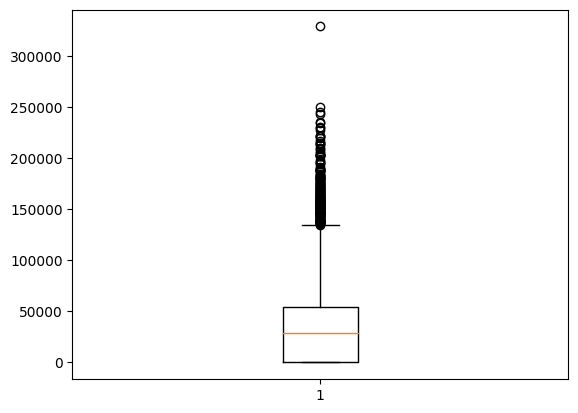

In [558]:
import matplotlib.pyplot as plt
plt.boxplot(df_train["mileage"])


`(Task 2, Question 5 Text Here - insert more cells as required)`

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and carefully write up your findings.
(2 marks)

<ipython-input-559-5d09b82c7cff>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


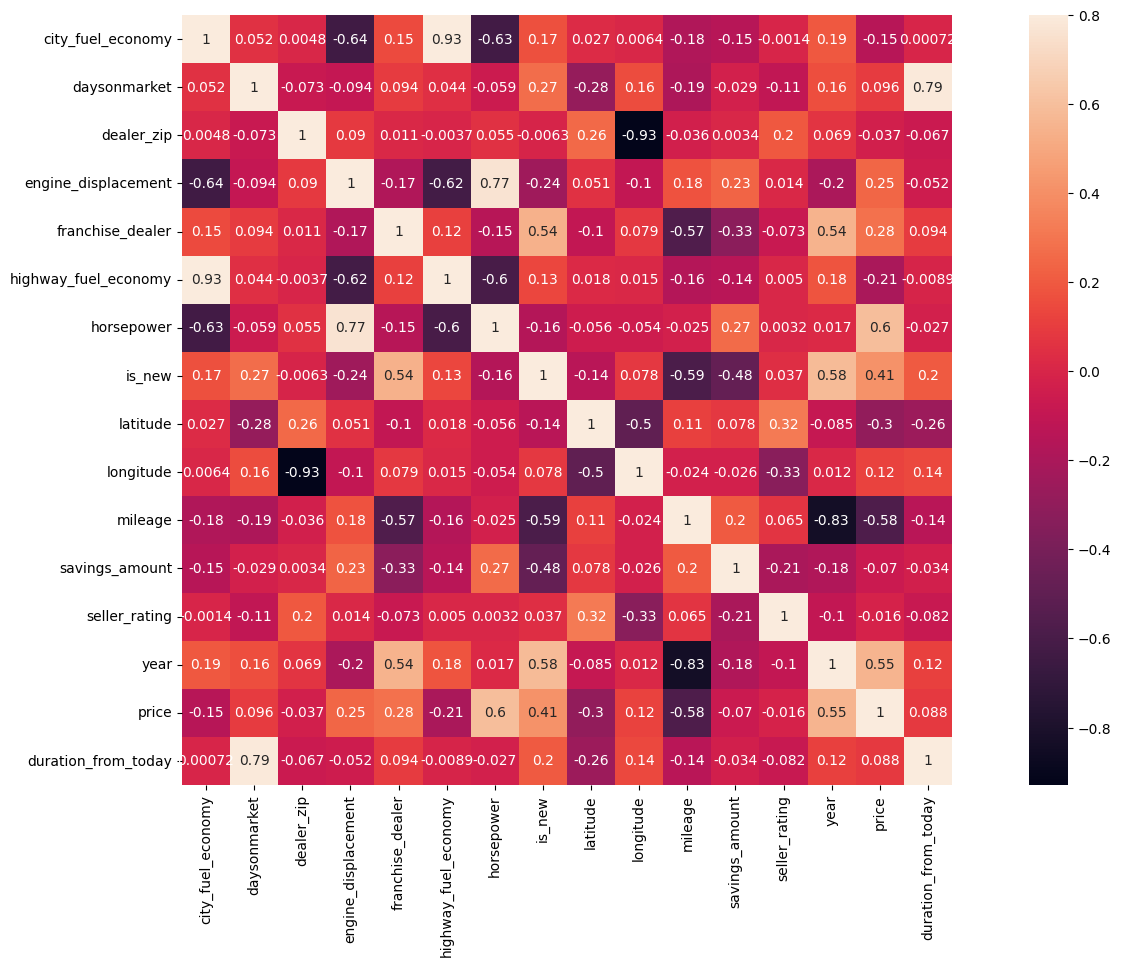

In [559]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df.corr()
# print(corrmat.round(3).to_string())
# corrmat

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)
plt.show()

In [560]:
print(corrmat.round(3).to_string())
corrmat

                      city_fuel_economy  daysonmarket  dealer_zip  engine_displacement  franchise_dealer  highway_fuel_economy  horsepower  is_new  latitude  longitude  mileage  savings_amount  seller_rating   year  price  duration_from_today
city_fuel_economy                 1.000         0.052       0.005               -0.637             0.147                 0.931      -0.625   0.168     0.027      0.006   -0.176          -0.150         -0.001  0.193 -0.150                0.001
daysonmarket                      0.052         1.000      -0.073               -0.094             0.094                 0.044      -0.059   0.268    -0.281      0.158   -0.187          -0.029         -0.111  0.158  0.096                0.790
dealer_zip                        0.005        -0.073       1.000                0.090             0.011                -0.004       0.055  -0.006     0.257     -0.929   -0.036           0.003          0.198  0.069 -0.037               -0.067
engine_displacement         

,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,longitude,mileage,savings_amount,seller_rating,year,price,duration_from_today
city_fuel_economy,1.000000,0.051901,0.004806,-0.636735,0.146914,0.930601,-0.625429,0.167919,0.026835,0.006362,-0.176101,-0.149840,-0.001408,0.192654,-0.150429,0.000716
daysonmarket,0.051901,1.000000,-0.072537,-0.094496,0.093581,0.044027,-0.059074,0.268482,-0.281481,0.157763,-0.187123,-0.029296,-0.111235,0.158363,0.095993,0.789831
dealer_zip,0.004806,-0.072537,1.000000,0.089991,0.010829,-0.003680,0.055278,-0.006279,0.257268,-0.929045,-0.035946,0.003436,0.198136,0.069237,-0.036932,-0.066552
engine_displacement,-0.636735,-0.094496,0.089991,1.000000,-0.173275,-0.623648,0.766162,-0.243927,0.051271,-0.103768,0.175618,0.234509,0.013808,-0.198402,0.245735,-0.051717
franchise_dealer,0.146914,0.093581,0.010829,-0.173275,1.000000,0.117828,-0.149061,0.538010,-0.100283,0.078730,-0.571068,-0.327296,-0.073461,0.544735,0.280803,0.093833
highway_fuel_economy,0.930601,0.044027,-0.003680,-0.623648,0.117828,1.000000,-0.601804,0.132929,0.017941,0.014513,-0.164227,-0.142716,0.004958,0.182793,-0.205468,-0.008930
horsepower,-0.625429,-0.059074,0.055278,0.766162,-0.149061,-0.601804,1.000000,-0.164408,-0.055782,-0.053740,-0.025375,0.265882,0.003171,0.016689,0.595805,-0.027304
is_new,0.167919,0.268482,-0.006279,-0.243927,0.538010,0.132929,-0.164408,1.000000,-0.141020,0.077742,-0.589535,-0.482620,0.037218,0.582164,0.414469,0.203551
latitude,0.026835,-0.281481,0.257268,0.051271,-0.100283,0.017941,-0.055782,-0.141020,1.000000,-0.499575,0.113135,0.077681,0.315535,-0.085079,-0.296162,-0.260223
longitude,0.006362,0.157763,-0.929045,-0.103768,0.078730,0.014513,-0.053740,0.077742,-0.499575,1.000000,-0.024339,-0.025598,-0.329689,0.012109,0.118370,0.143451


In [561]:
df_train.describe()

,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,...,exterior_color_Gray,exterior_color_Other,exterior_color_Summit White,exterior_color_White,body_type_Coupe,body_type_Minivan,body_type_Other,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,37.410542,21.655220,78.987714,11876.966857,2749.185185,42.068657,18.037047,63.986299,28.658997,242.296889,...,0.024857,0.795714,0.021143,0.044857,0.026286,0.024000,0.061714,0.047429,0.545714,0.294857
std,2.708437,6.859506,104.838545,10893.589741,1095.470586,1.605977,4.109359,6.207608,6.531354,85.714089,...,0.155712,0.403236,0.143881,0.207020,0.160007,0.153071,0.240670,0.212584,0.497977,0.456044
min,0.000000,10.000000,0.000000,922.000000,1000.000000,35.800000,9.000000,47.800000,13.000000,78.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.700000,18.000000,17.000000,7036.000000,2000.000000,41.000000,15.500000,58.000000,25.000000,178.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.800000,21.000000,39.500000,8812.000000,2400.000000,41.500000,17.400000,65.000000,28.658997,241.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,39.000000,23.000000,82.000000,11706.000000,3500.000000,42.600000,19.500000,67.800000,30.000000,290.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,47.500000,127.000000,698.000000,49203.000000,7000.000000,67.000000,48.000000,107.700000,122.000000,797.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


`(Task 2, Question 6 Text Here - insert more cells as required)`

In [562]:


df_test.describe()

,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,...,exterior_color_Gray,exterior_color_Other,exterior_color_Summit White,exterior_color_White,body_type_Coupe,body_type_Minivan,body_type_Other,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.0000,1500.000000,1500.000000,1500.000000,1500.000000
mean,37.508867,21.239113,79.226667,12439.101333,2836.363636,42.205157,18.286800,64.174933,28.337292,245.126995,...,0.024667,0.794667,0.018000,0.047333,0.029333,0.0240,0.046000,0.062667,0.531333,0.306667
std,2.523466,5.020159,115.406573,11582.070159,1112.502347,1.899131,4.276108,6.471021,5.232443,85.341482,...,0.155159,0.404080,0.132995,0.212422,0.168795,0.1531,0.209555,0.242443,0.499184,0.461264
min,25.400000,12.000000,0.000000,922.000000,1000.000000,37.700000,9.300000,45.900000,14.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,35.700000,18.000000,15.000000,7036.000000,2000.000000,41.100000,15.600000,58.100000,25.000000,180.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
50%,38.200000,21.000000,38.000000,10466.000000,2500.000000,41.700000,18.000000,65.200000,28.337292,241.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000
75%,39.000000,23.000000,77.000000,11706.000000,3500.000000,42.800000,19.800000,68.400000,30.000000,295.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,1.000000
max,45.200000,70.000000,1252.000000,49203.000000,6700.000000,67.000000,48.000000,105.900000,75.000000,717.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000


<ipython-input-563-c545de8dab59>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['price'])


<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

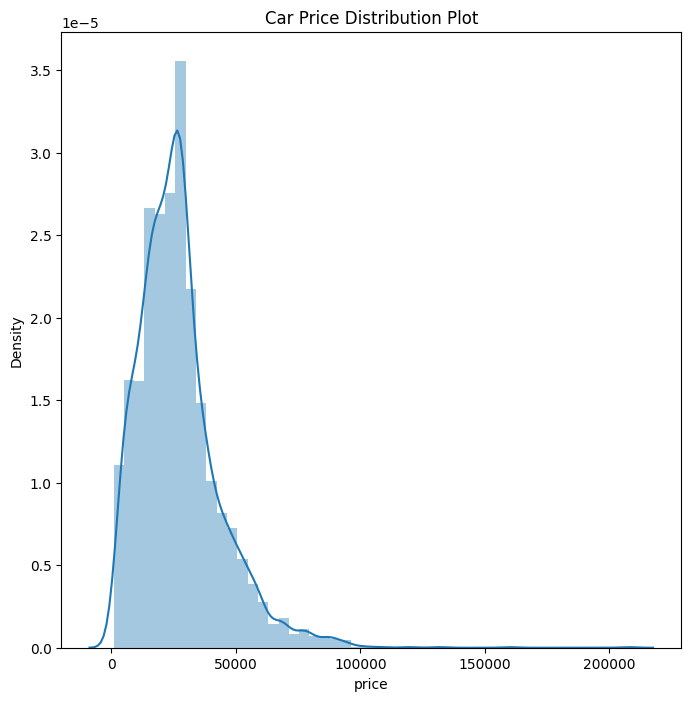

In [563]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df_train['price'])

<Axes: xlabel='fuel_type', ylabel='price'>

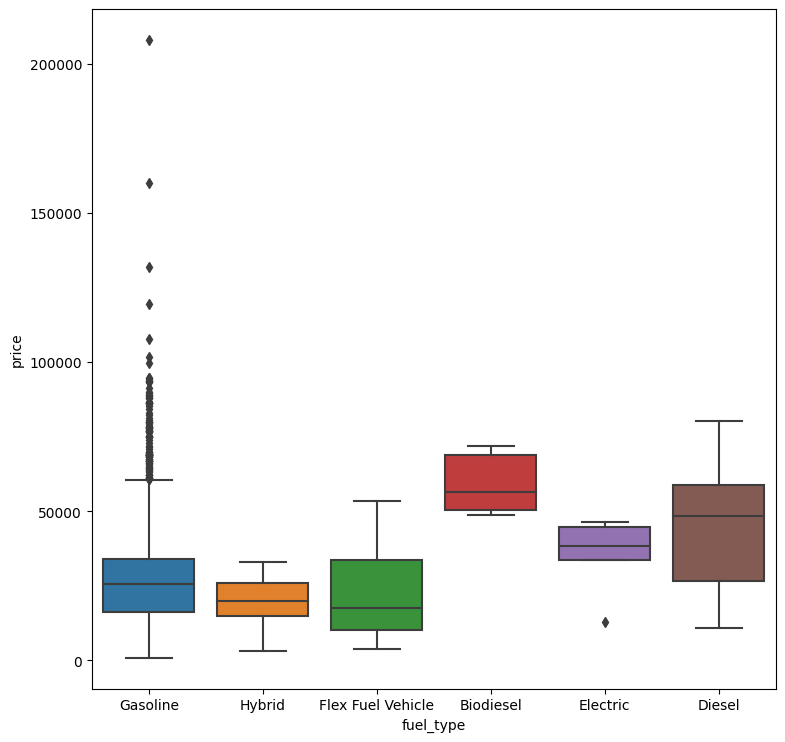

In [564]:
plt.figure(figsize=(30, 30))
plt.subplot(3,3,1)
sns.boxplot(x = 'fuel_type', y = 'price', data = df)

<Axes: xlabel='is_new', ylabel='price'>

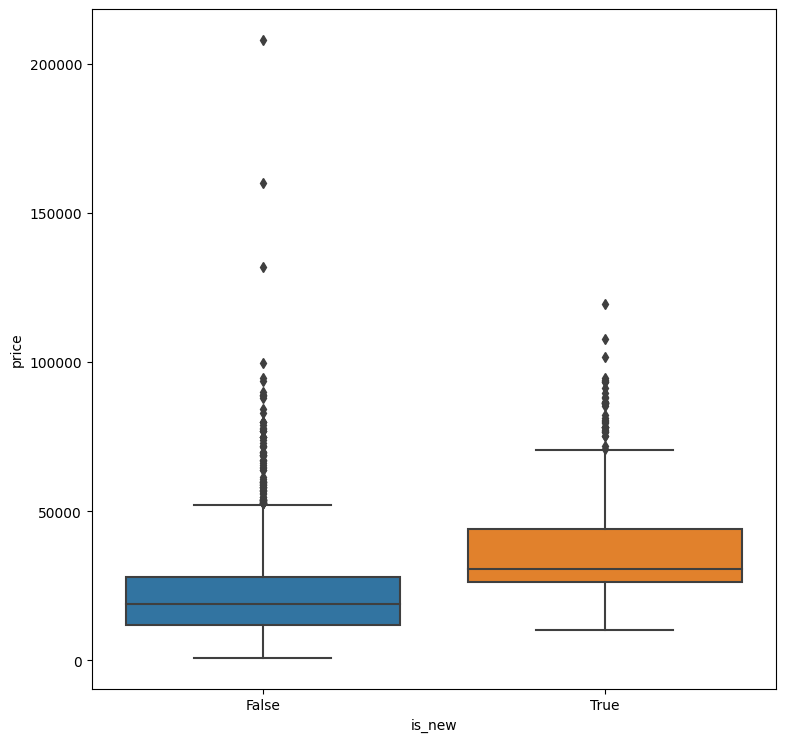

In [565]:
plt.figure(figsize=(30, 30))
plt.subplot(3,3,1)
sns.boxplot(x = 'is_new', y = 'price', data = df)

<Axes: xlabel='body_type', ylabel='price'>

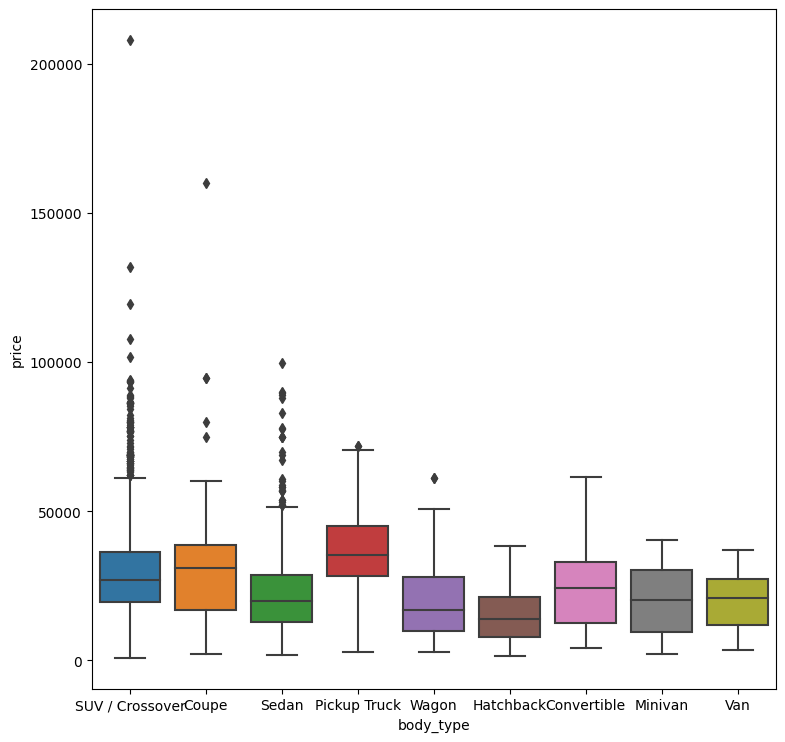

In [566]:


plt.figure(figsize=(30, 30))
plt.subplot(3,3,1)
sns.boxplot(x = 'body_type', y = 'price', data = df)

---
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking

Make sure you **clearly explain each step** you do both in text and on the recoded video.   
This task must not create any additional features and has to use on the dataset constructed in Task 2.

1. Build at least 3 machine learning (ML) regression models taking into account the outcomes of Tasks 1 & 2 (Explain Carefully)
2. Fit the models and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Select your best algorithm, create predictions using the test dataset, and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and comment
5. Make sure your Python code works, so that a marker that can replicate your all Kaggle Score   

- Hint: to perform well you will need to iterate Tasks 2 and Task 3.

Total Marks: 12

In [595]:
# df_train.columns

In [585]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import numpy as np

limited_features= ['back_legroom', 'city_fuel_economy',  'dealer_zip',
       'front_legroom',
       'fuel_tank_volume', 'height',  'horsepower',
       'is_new', 'latitude', 'length',
        'longitude', 'maximum_seating', 'mileage',
        'seller_rating', 'width', 'year',
        'maximum_torque',
       'wheel_system_4WD', 'wheel_system_4X2', 'wheel_system_AWD',
       'wheel_system_FWD', 'wheel_system_RWD', 'make_name_Chevrolet',
       'make_name_Ford', 'make_name_Hyundai', 'make_name_Jeep',
       'make_name_Kia', 'make_name_Other', 'fuel_type_Diesel',
       'fuel_type_Flex Fuel Vehicle', 'fuel_type_Gasoline', 'fuel_type_Hybrid',
       'fuel_type_Other', 'model_name_Equinox', 'model_name_Grand Cherokee',
       'model_name_Other', 'model_name_Sonata', 'model_name_Tucson',
       'engine_type_I4', 'engine_type_I4 Hybrid', 'engine_type_I6',
       'engine_type_Other', 'engine_type_V6', 'engine_type_V8',
       'transmission_A', 'transmission_CVT', 'transmission_Dual Clutch',
       'transmission_M', 'city_Bay Shore', 'city_Bohemia',
       'city_East Hartford', 'city_Other', 'city_Stamford', 'city_West Nyack',
       'body_type_Coupe', 'body_type_Minivan',
       'body_type_Other', 'body_type_Pickup Truck',
       'body_type_SUV / Crossover', 'body_type_Sedan']

X_train = df_train[limited_features].values
X_test = df_test[limited_features].values
y_train = df_train['price'].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)



In [586]:



from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import pandas as pd
import numpy as np



# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300,500],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.3,0.5],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [5,6, 7]  # Maximum depth of the tree
}
# XGBoost Regressor
xgb_regressor = XGBRegressor(random_state = 42)
# K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameter
best_params = grid_search.best_params_
xgb_crossvalscore= cross_val_score(xgb_regressor,X_train_scaled,y_train,scoring="neg_mean_squared_error",cv=kfold)
# Make predictions
xgb_model = xgb.XGBRegressor(n_estimators=best_params["n_estimators"],
                             learning_rate=best_params["learning_rate"],
                            max_depth= best_params["max_depth"])
xgb_model=xgb_regressor.fit(X_train_scaled,y_train)
predictions1 = xgb_model.predict(X_train_scaled)
y_test_pred1 = xgb_model.predict(X_test_scaled)
print(f" crossvalidation score:{xgb_crossvalscore}")
print(f"Best Hyperparameters: {best_params}")
print({f'MSE train: {mean_squared_error(y_train,predictions1,squared=False)}'})
y_test_pred1

 crossvalidation score:[-55023034.80295375 -26777288.17471469 -18163883.1973778
 -24530046.31878853 -14425984.540978  ]
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
{'MSE train: 1492.0207324227786'}


array([17911.197, 34472.777, 13337.712, ..., 12101.467, 26820.719,
       22593.602], dtype=float32)

                      Feature  Importance
18                       year    0.209790
7                  horsepower    0.170322
19             maximum_torque    0.082626
30            make_name_Other    0.078897
8                      is_new    0.059187
..                        ...         ...
34           fuel_type_Hybrid    0.000643
38           model_name_Other    0.000566
49   transmission_Dual Clutch    0.000387
37  model_name_Grand Cherokee    0.000252
42      engine_type_I4 Hybrid    0.000000

[63 rows x 2 columns]


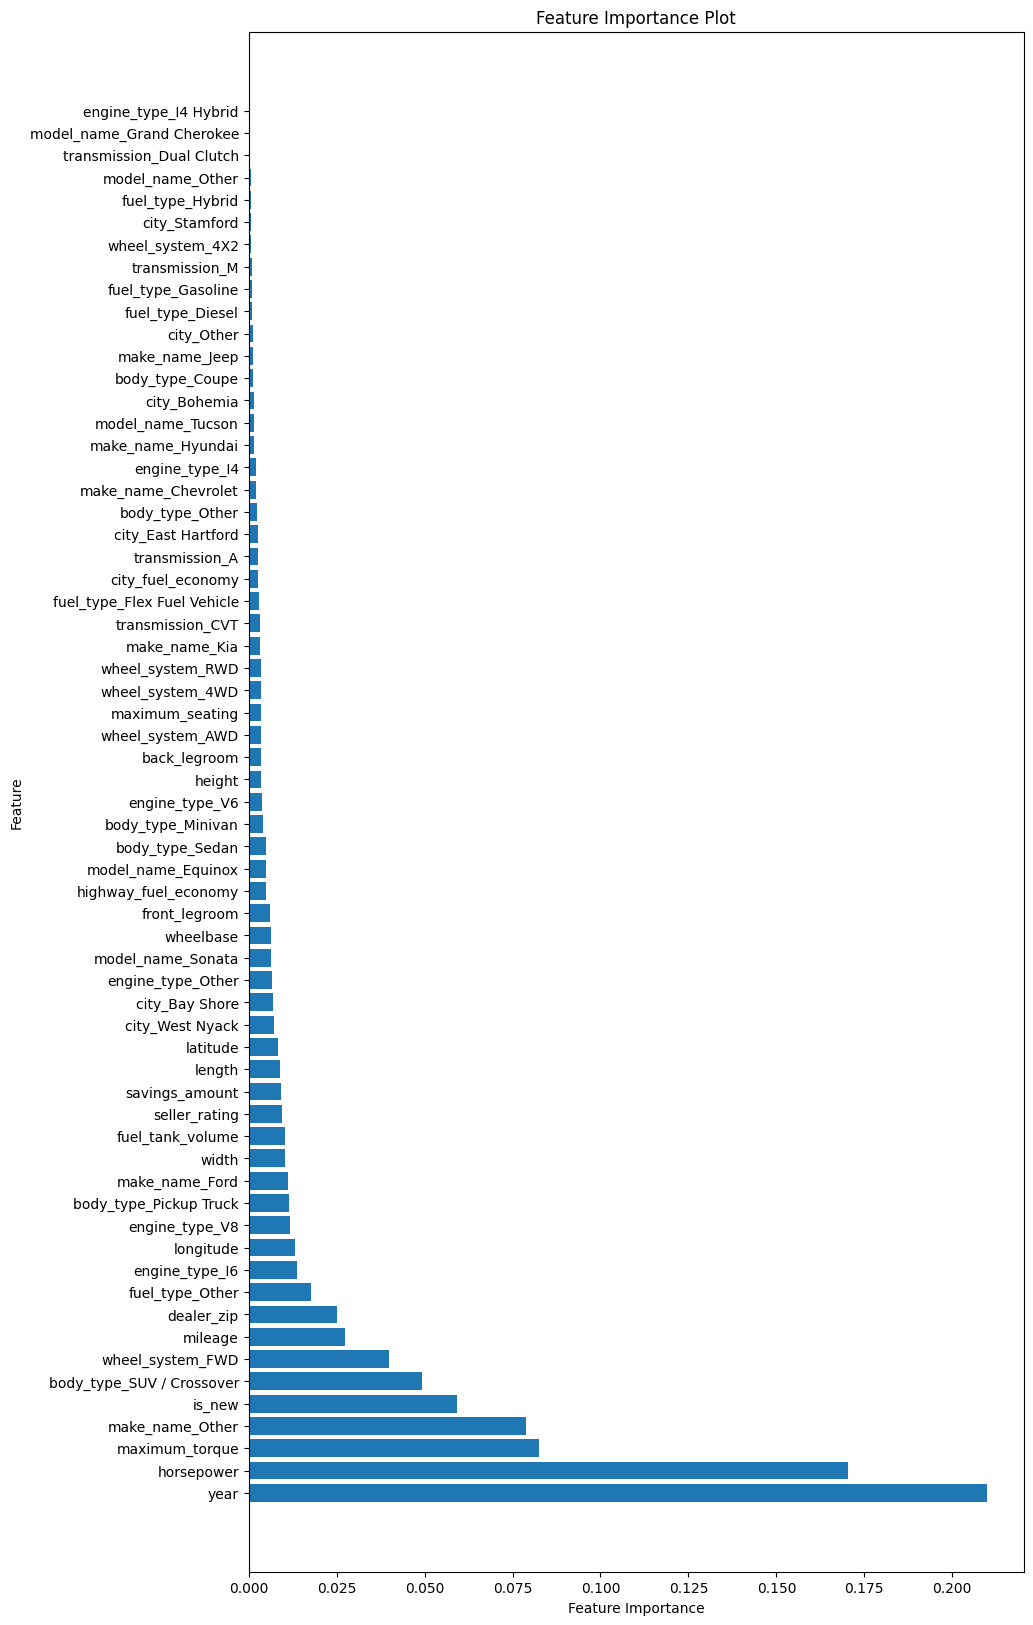

In [573]:
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': limited_features, 'Importance': importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 20))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

In [577]:
#running the model with the best features
columns=feature_importance_df['Feature']
X_train_best=df_train[columns].values
X_test_best=df_test[columns].values
y_train
xgb_model=xgb_regressor.fit(X_train_best,y_train)
predictions1 = xgb_model.predict(X_train_best)
y_test_pred1 = xgb_model.predict(X_test_best)

print({f'MSE train: {mean_squared_error(y_train,predictions1,squared=False)}'})
y_test_pred1

{'MSE train: 1360.3355729437915'}


array([18556.162, 38796.918, 13792.072, ..., 12122.066, 27253.033,
       19578.887], dtype=float32)

In [571]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Lasso Regression
lasso_regressor = Lasso()

# Define hyperparameters for tuning
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Regularization strength
    'max_iter': [1000, 2000, 3000]  # Maximum number of iterations
}
#KFOLD
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=lasso_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

lasso = Lasso(alpha = best_params['alpha'], max_iter = best_params['max_iter'])
lasso.fit(X_train_scaled, y_train)
y_train_pred2 = lasso.predict(X_train_scaled)
y_test_pred2 = lasso.predict(X_test_scaled)
print({f'MSE train: {mean_squared_error(y_train, y_train_pred2,squared=False)}'})
y_test_pred2

# Train Lasso with the best hyperparameters
#best_lasso_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.011e+09, tolerance: 7.469e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.757e+09, tolerance: 7.854e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.853e+09, tolerance: 7.675e

Best Hyperparameters: {'alpha': 10.0, 'max_iter': 1000}
{'MSE train: 7463.961875567568'}


array([20728.50957572, 34767.4082814 , 10520.28983499, ...,
       18827.40339461, 27259.16914242, 24750.50115799])

In [584]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()

# Define a grid of hyperparameters to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Set up GridSearchCV with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Train a KNN regressor with the best hyperparameters
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test)
y_train_pred = best_knn.predict(X_train)
# Evaluate the model's performance on the test set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print(f'Best K: {best_k}')
print(f'RMSE (train set): {rmse_train:.3f}')
y_pred

Best K: 7
RMSE (train set): 8526.551


array([24203.28571429, 18257.        , 23358.42857143, ...,
       12666.28571429, 26965.71428571, 23511.71428571])

In [579]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Step 1: Create a Random Forest Regressor as the base estimator
base_estimator = RandomForestRegressor(n_estimators=1000,n_jobs=-1, random_state=1)

# Step 2: Create the AdaBoostRegressor with the Random Forest base estimator
adaboost_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=1)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Step 4: Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(adaboost_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
# Step 3: Fit the AdaBoost model to the training data
#adaboost_model.fit(X_train, y_train)

# Step 4: Use the trained AdaBoost model to make predictions
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
# Step 5: Evaluate the model's performance (MSE in this case)

print(f'MSE train: {mean_squared_error(y_train, y_train_pred,squared=False):.3f}')
y_test_pred

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

pipe_rf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 300, 500],  # Number of trees in the forest
    'randomforestclassifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'randomforestclassifier__min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

gs_rf = GridSearchCV(estimator=pipe_rf,
                     param_grid=param_grid_rf,
                     scoring='accuracy',
                     refit=True,
                     cv=10,
                     n_jobs=-1)

gs_rf = gs_rf.fit(X_train, y_train)

print(gs_rf.best_score_)
print(gs_rf.best_params_)

best_classifier_rf = gs_rf.best_estimator_

print(best_classifier_rf)
print(f'Test accuracy: {best_classifier_rf.score(X_test, y_test):.3f}')
print(best_classifier_rf.predict(X_test))

In [ ]:
# combined_dataa = pd.concat([vin_df, pd.Series(y_test_pred1, name='price')], axis=1)
# file_name = 'new_three.xlsx'

# combined_dataa.to_excel(file_name, index=False)

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)

ridge.fit(X_train_scaled, y_train)

y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)
print({f'MSE train: {mean_squared_error(y_train, y_train_pred_ridge,squared=False)}'})
#minor diff better than Lasso
y_test_pred_ridge
combined4_data = pd.concat([vin_df, pd.Series(y_test_pred, name='price')], axis=1)
file_name = 'combined4_data.xlsx'
combined4_data.to_excel(file_name,file_name, index=False)

`(Task 3 - insert more cells as required)`

Ranked 16 in Kaggle with score equal to 5152.30777

## Marking Criteria

- Marking Rubrics
    - Problem Description - 12 marks
    - Data Cleaning - 12 marks
    - Building Forecasting models - 12 marks
    - Competition Points - 4 marks


- To receive full marks your solutions must satisfy the following criteria:
    - Provide Python solutions that follow the modelling methodology developed in BUSA8001   
    - Written answers explain your logic and Python code in detail, and beformulated in easy to understand full sentences   
    
---
---